In [143]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
from statistics import mode

# Parsing the JSON to dictionary

In [25]:
pupils = json.load(open('pupils.json', 'r'))    # result will be a python dictionary

#jeder entry ist ein schüler: zB data[0]
len(pupils)
#2214
print(pupils[0])

{'_id': 'oCCFCrudruiEyrif9', 'classId': 'x6Lg4vTtWpCZ92a4B', 'userId': 'GYGgx9yLqSJ4uHmJp', 'companyId': 'tCiM5DZkteTvEDCnw', 'partner': ['pear2'], 'lang': 'de', 'username': 'Kai1', 'shownTaskSeries': ['If-Else-1'], 'currentTaskSeries': [], 'solvedTaskSeries': [{'taskSeriesId': 'Algorithmic-1', 'currentSections': [{'currentSubSections': [{'duration': 7, 'exercise': {'state': {'code': "moveForward('To}55mI6)_S@clnS`X-A');\nmoveForward('cN6xgVR3:EAoi_G*O+s%');\nmoveForward('4Fpi1i6(r(wn%5JKDZxK');\nmoveForward('r0,nkc*$uzIf%t,5^=LT');\n", 'workspace': '<xml xmlns="https://developers.google.com/blockly/xml">\n  <block type="mainBlock" id="initialMainBlock" deletable="false" movable="false" editable="false" x="38" y="38">\n    <statement name="EXECUTE">\n      <block type="pp_Maze_moveForward" id="To}55mI6)_S@clnS`X-A">\n        <next>\n          <block type="pp_Maze_moveForward" id="cN6xgVR3:EAoi_G*O+s%">\n            <next>\n              <block type="pp_Maze_moveForward" id="4Fpi1i6(r(w

In [23]:
print(pupils[0].keys())
print(pupils[1].keys())
#['_id', 'classId', 'userId', 'companyId', 'partner', 'lang', 'username', 'shownTaskSeries', 'currentTaskSeries', 'solvedTaskSeries', 'revisions', 'workspaceContent', 'chat', 'assists', 'experience', 'lastNotificationUpdate']

dict_keys(['_id', 'classId', 'userId', 'companyId', 'partner', 'lang', 'username', 'shownTaskSeries', 'currentTaskSeries', 'solvedTaskSeries', 'revisions', 'workspaceContent', 'chat', 'assists', 'experience', 'lastNotificationUpdate'])
dict_keys(['_id', 'classId', 'userId', 'companyId', 'partner', 'lang', 'username', 'shownTaskSeries', 'currentTaskSeries', 'solvedTaskSeries', 'revisions', 'workspaceContent', 'chat', 'assists', 'experience', 'lastNotificationUpdate'])


* _id
* classId
* userId
* companyId
* partner
* lang
* username
* shownTaskSeries
* currentTaskSeries
* solvedTaskSeries
    * taskSeriesId
    * currentSections
        * currentSubSections
            * duration (in sekunden)
            * exercise
                * state:
                    * text bei freitext in p tags
                    * 0, 1, 0... bei survey
                    * false, true, false bei MC
                * submitted: true
                * subType “freetext”, “survey”, “multipleChoice”
                * history: wahrscheinlich alte versionen bei freetext
                * falseAttempts bei MC: bool array mit erster lösung
                * evaluation: (bool) bei freetext und MC
                    * “false” bei mc wenn falsche lösung und keine tipps → direkt musterlösung
                    * “correct” bei mc wenn richtige lösung
                    * “pending” bei freitext, wenn lehrer noch nicht bewertet
                * rating: bei freetext
    * revisions
        * (id, taskseriesid, was um die section zu finden)
        * accepted: false
        * …
    * chat
    * assists
    * experience

# EDA

## Alle tasks für einen Schüler checken

[7, 10, 7, 10, 15, 5, 4, 5, 3, 1, 3, 23, 10, 8, 11, 1, 6, 5, 4, 1, 9, 4, 2, 38, 55, 5, 16, 28, 24, 2, 7, 13, 24, 13, 2, 11, 11, 5, 5, 4, 26, 17, 24, 29, 2, 16, 4, 12, 14, 14, 3, 17, 24, 8, 1, 4, 16, 16, 4, 2, 16, 33, 34]
Minimal time: 1
Maximal time: 55
Average time in sec: 11.952380952380953


(array([4., 5., 3., 7., 6., 1., 3., 2., 1., 3., 3., 1., 2., 2., 1., 5., 2.,
        0., 0., 0., 0., 0., 1., 4., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1.]),
 array([ 1.        ,  1.98181818,  2.96363636,  3.94545455,  4.92727273,
         5.90909091,  6.89090909,  7.87272727,  8.85454545,  9.83636364,
        10.81818182, 11.8       , 12.78181818, 13.76363636, 14.74545455,
        15.72727273, 16.70909091, 17.69090909, 18.67272727, 19.65454545,
        20.63636364, 21.61818182, 22.6       , 23.58181818, 24.56363636,
        25.54545455, 26.52727273, 27.50909091, 28.49090909, 29.47272727,
        30.45454545, 31.43636364, 32.41818182, 33.4       , 34.38181818,
        35.36363636, 36.34545455, 37.32727273, 38.30909091, 39.29090909,
        40.27272727, 41.25454545, 42.23636364, 43.21818182, 44.2       ,
        45.18181818, 46.16363636, 47.14545455, 48.12727273, 49.10909091,
        50.09090

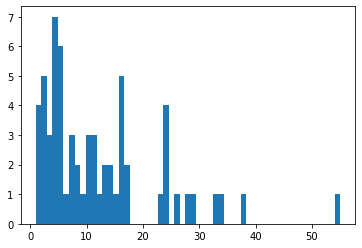

In [5]:
#["solvedTaskSeries"]#["currentSections"]#["currentSubSections"]
len(pupils[0]["solvedTaskSeries"]) #24 tasks gelöst
pupils[0]["solvedTaskSeries"]

durations = []

for task in range(len(pupils[0]["solvedTaskSeries"])): #alle tasks für einen schüler
    #print("task " + str(task))
    #print(data[0]["solvedTaskSeries"][task])
    for section in pupils[0]["solvedTaskSeries"][task]["currentSections"]: #für diese tasks, alle sections
        #print("section ")
        #print(type(section)) --> dict
        #print(section["currentSubSections"][0])
        for subsection in pupils[0]["solvedTaskSeries"][task]["currentSections"][0]["currentSubSections"]:
            #print("subsection")
            #print(subsection["duration"])
            durations.append(subsection["duration"])

            
#durations:
print(durations)
print("Minimal time: " + str(min(durations)))
print("Maximal time: " + str(max(durations)))
print("Average time in sec: " + str(sum(durations)/len(durations)))       
plt.hist(durations, bins=max(durations))

## Nach Aufgabentyp

In [39]:
tasktypes = ["blockly", "multipleChoice", "freetext", "survey", "inputField", "surveySlider", "noTask"]

durations = { tasktype: {"summe": 0, "count": 0, "avrg": 0} for tasktype in tasktypes}

missing_tasktype = []

#for pupilnumber in range(len(pupils[0:5])): #für die ersten 5 schüler
for pupilnumber in range(len(pupils)): #für jeden schüler
    for tasknumber in range(len(pupils[pupilnumber]["solvedTaskSeries"])): #für jede seiner tasks
        #print(pupilnumber, tasknumber)  --> macht er nur für einen? oder haben die anderen einfach keine?
        for sectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"])): #für diese tasks, alle sections
            for subsectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"])):
                if("exercise" in pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber].keys()): #nicht alle aufgaben haben eine exercise
                    if pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "blockly":
                        durations["blockly"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["blockly"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "multipleChoice":
                        durations["multipleChoice"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["multipleChoice"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "freetext":
                        durations["freetext"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["freetext"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "survey":
                        durations["survey"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["survey"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "inputField":
                        durations["inputField"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["inputField"]["count"] += 1
                    elif pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] == "surveySlider":
                        durations["surveySlider"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                        durations["surveySlider"]["count"] += 1
                    else:
                        if pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"] not in missing_tasktype:
                            missing_tasktype.append(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["exercise"]["subType"])

                else:
                    durations["noTask"]["summe"] += pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"]
                    durations["noTask"]["count"] += 1
                    #print(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber]["duration"])
#print(missing_tasktype)

for tasktype in durations:
    durations[tasktype]["avrg"] = durations[tasktype]["summe"]/durations[tasktype]["count"]
    
#print(durations)

#avrg_durations = [durations[tasktype]["avrg"] for tasktype in durations]
avrg_durations = {tasktype: durations[tasktype]["avrg"] for tasktype in durations}
print(avrg_durations)

{'blockly': 213.6818086665271, 'multipleChoice': 76.4256860286948, 'freetext': 277.321554770318, 'survey': 52.75100942126514, 'inputField': 53.24590163934426, 'surveySlider': 21.224137931034484, 'noTask': 10.59476173153874}


([<matplotlib.axis.XTick at 0x7f9488c98c90>,
 [Text(0, 0, 'blockly'),
  Text(1, 0, 'multipleChoice'),
  Text(2, 0, 'freetext'),
  Text(3, 0, 'survey'),
  Text(4, 0, 'inputField'),
  Text(5, 0, 'surveySlider'),
  Text(6, 0, 'noTask')])

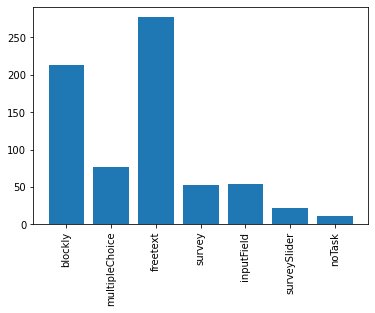

In [40]:
plt.bar(range(len(avrg_durations)), list(avrg_durations.values()), align='center')
plt.xticks(range(len(avrg_durations)), list(avrg_durations.keys()), rotation=90)

## Nur für das KI Paket

### Wie viele Klassen haben es gemacht? Wie viele SuS?

In [152]:
# taskseriesIDs vom KI Paket:
KI_taskseries_ids = ["AI-1-v2", "AI-2-v2", "AI-3-v2", "AI-4-v2", "ML-1", "ML-2", "ML-3", "Classification-1", "Clustering-1", "Classification-2", "Clustering-2", "LimitsML", "EvalML", "Impact-1", "Impact-2", "Impact-3", "Impact-4", "AIClosing"]

classIDsKI = []
pupilsKI = []

for pupilnumber in range(len(pupils)): #für jeden schüler
    for tasknumber in range(len(pupils[pupilnumber]["solvedTaskSeries"])): #für jede seiner tasks
        if(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["taskSeriesId"] in KI_taskseries_ids):
            for sectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"])): #für diese tasks, alle sections
                for subsectionnumber in range(len(pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"])):
                    if("exercise" in pupils[pupilnumber]["solvedTaskSeries"][tasknumber]["currentSections"][sectionnumber]["currentSubSections"][subsectionnumber].keys()):
                        if pupils[pupilnumber]["classId"] not in classIDsKI:
                            classIDsKI.append(pupils[pupilnumber]["classId"])
                        if pupils[pupilnumber] not in pupilsKI:
                            pupilsKI.append(pupils[pupilnumber])

#print(classIDsKI) #--> ['uxfuiLT4xZA6yvE6L', 'qFEyvypMn4sAwLwtc', 'y7j9eKDPsqNkAycuy', '6Z2MmkKQKebb7nz8P', '4fyXxCKaLbCBaPbYE']
#print(len(pupils), len(pupilsKI)) --> 31 in pupilsKI

KI_classes = {classID: {"count": 0} for classID in classIDsKI}

for pupil in pupilsKI:
    KI_classes[pupil["classId"]]["count"] += 1

print(KI_classes)
print("")

# Jetzt nur die Klassen mit genügend SuS auswählen
final_pupils_KI = []
min_class_size = 10

for pupil in pupilsKI:
    if(KI_classes[pupil["classId"]]["count"] >= min_class_size):
        final_pupils_KI.append(pupil)

print("Zur Zeit gibt es " + str(len(final_pupils_KI)) + " sus, die das KI Paket bearbeitet haben")

{'uxfuiLT4xZA6yvE6L': {'count': 2}, 'qFEyvypMn4sAwLwtc': {'count': 26}, 'y7j9eKDPsqNkAycuy': {'count': 1}, '6Z2MmkKQKebb7nz8P': {'count': 1}, '4fyXxCKaLbCBaPbYE': {'count': 1}}

Zur Zeit gibt es 26 sus, die das KI Paket bearbeitet haben


### Wie viele Aufgaben haben die SuS jeweils gemacht?

NR tasks per pupil: [18, 18, 3, 11, 18, 10, 10, 18, 15, 11, 13, 15, 4, 2, 6, 6, 12, 11, 18, 18, 18, 3, 5, 9, 9, 1]
Completion rates: [100, 100, 16, 61, 100, 55, 55, 100, 83, 61, 72, 83, 22, 11, 33, 33, 66, 61, 100, 100, 100, 16, 27, 50, 50, 5]


Number SuS in each quartile: [5, 5, 7, 9]
Percent of students that have completed these quarts: [19.23, 19.23, 26.92, 34.62]


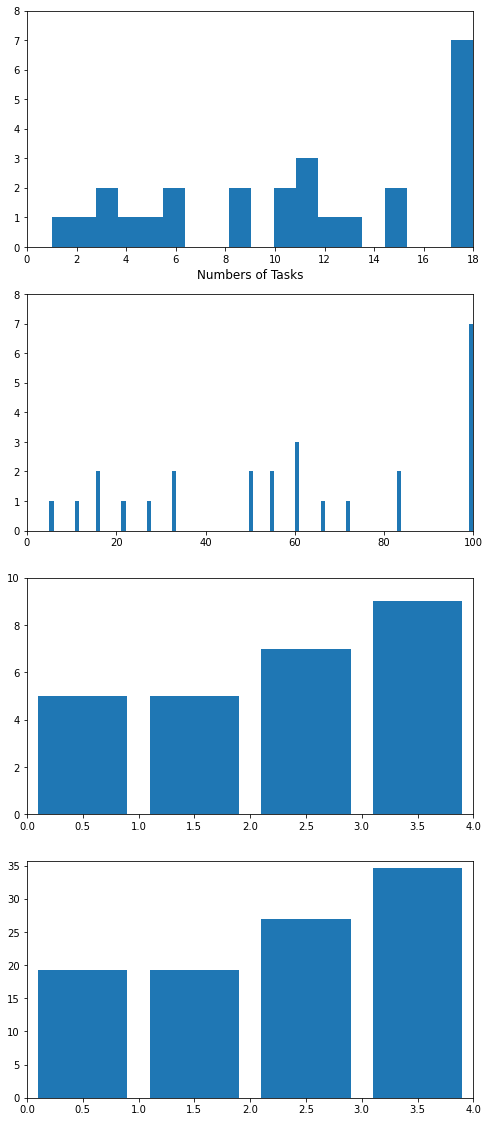

'\nTODO:\n- kumulativ: wie viele SuS haben mindestens X aufgaben gelöst?\n'

In [234]:
nr_tasks_per_pupil = []

# Könnte für jeden SoS schauen, ob sie alle aufgaben gemacht haben.
for pupil in final_pupils_KI:
    nr_tasks_per_pupil.append(len(pupil["solvedTaskSeries"]))

print("NR tasks per pupil: " + str(nr_tasks_per_pupil))
nr_all_tasks = 18

completion_rates = [int((nr_tasks/nr_all_tasks)*100) for nr_tasks in nr_tasks_per_pupil]
print("Completion rates: " + str(completion_rates))
print("\n")




# SUS per QUARTILE
quartiles = [0 for quartile in range(1, 5)]

for rate in completion_rates:
    if (rate<=25):
        quartiles[0] += 1
    elif(rate > 25 and rate <=50):
        quartiles[1] += 1
    elif(rate > 50 and rate <=75):
        quartiles[2] += 1
    elif(rate > 75 and rate <=100):
        quartiles[3] += 1

print("Number SuS in each quartile: " + str(quartiles)) 

# in percent
percentage_sus_per_quart = [round((number/np.sum(quartiles))*100, 2) for number in quartiles]
print("Percent of students that have completed these quarts: " + str(percentage_sus_per_quart))





# PLOTS
fig, (ax1,ax2, ax3, ax4) = plt.subplots(nrows=4,ncols=1,figsize=(8,20))

ax1 = plt.subplot(411)
ax1.hist(nr_tasks_per_pupil, bins=np.max(nr_tasks_per_pupil)+1)
#ax1.set_title('Numbers of Tasks')
ax1.set_xlabel( "Numbers of Tasks" , size = 12 )
ax1.set_xlim([0, max(nr_tasks_per_pupil)])
ax1.set_ylim([0, nr_tasks_per_pupil.count(mode(nr_tasks_per_pupil))+1])

ax2 = plt.subplot(412)
ax2.hist(completion_rates, bins=np.max(completion_rate))
ax2.set_xlim([0, max(completion_rate)])
ax2.set_ylim([0, completion_rate.count(mode(completion_rate))+1])


ax3 = plt.subplot(413)
ax3.bar([elem + 0.5 for elem in range(len(quartiles))], quartiles)
ax3.set_xlim([0, len(quartiles)])
ax3.set_ylim([0, max(quartiles)+1])

ax4 = plt.subplot(414)
ax4.bar([elem + 0.5 for elem in range(len(percentage_sus_per_quart))], percentage_sus_per_quart)
ax4.set_xlim([0, len(percentage_sus_per_quart)])
ax4.set_ylim([0, max(percentage_sus_per_quart)+1])

plt.show()


"""
TODO:
- kumulativ: wie viele SuS haben mindestens X aufgaben gelöst?
"""

In [237]:
sorted_completion_rates = np.sort(completion_rates)
print(sorted_completion_rates)

#kum_completion_rates = [elem for elem in np.sort(completion_rates) if ]

[  5  11  16  16  22  27  33  33  50  50  55  55  61  61  61  66  72  83
  83 100 100 100 100 100 100 100]


### Durations KI Paket



total_duration                399.00
total_duration_minutes          6.65
number_tasks                    4.00
avg_duration_per_task_secs     22.24
dtype: float64


total_duration                8445.00
total_duration_minutes         140.75
number_tasks                    80.00
avg_duration_per_task_secs     288.11
dtype: float64


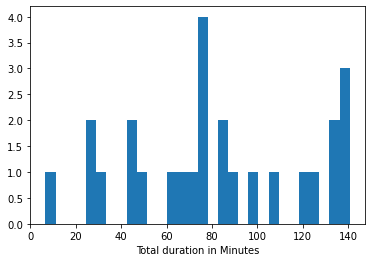

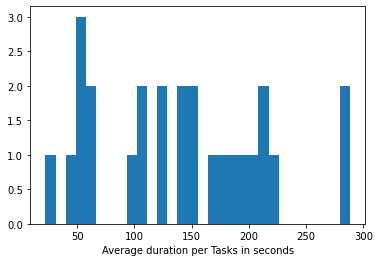

,total_duration,total_duration_minutes,number_tasks,avg_duration_per_task_secs
count,26.000000,26.000000,26.000000,26.000000
mean,4921.769231,82.029487,45.730769,140.498462
std,2355.092683,39.251545,26.785903,73.217406
min,399.000000,6.650000,4.000000,22.240000
25%,3077.500000,51.291667,24.000000,69.660000
50%,4607.500000,76.791667,44.000000,141.640000
75%,7058.750000,117.645833,76.250000,191.180000
max,8445.000000,140.750000,80.000000,288.110000


In [229]:
per_student = {str(pupil["_id"]): {"total_duration": 0, "total_duration_minutes": 0,"number_tasks": 0, "avg_duration_per_task_secs": 0} for pupil in final_pupils_KI}

for pupil in final_pupils_KI: #für jeden schüler
    #print(pupil)
    for task in pupil["solvedTaskSeries"]:
        #print(task)
        for subsections in task["currentSections"]:
            #print(subsections)
            for subsection in subsections["currentSubSections"]:
                #total_duration += subsection["duration"]
                #total_task_count += 1
                per_student[pupil["_id"]]["total_duration"] += subsection["duration"]
                per_student[pupil["_id"]]["number_tasks"] += 1
                pass
    per_student[pupil["_id"]]["avg_duration_per_task_secs"] = round(per_student[pupil["_id"]]["total_duration"]/per_student[pupil["_id"]]["number_tasks"], 2)
    per_student[pupil["_id"]]["total_duration_minutes"] = per_student[pupil["_id"]]["total_duration"]/60

#print("Average Duration KI Paket: " + str(total_duration / len(final_pupils_KI)))
#print(per_student)

per_student_df = pd.DataFrame.from_dict(per_student).T

print("\n")
print(per_student_df.min())
print("\n")
print(per_student_df.max())

#plt.hist(per_student_df["total_duration_minutes"], bins=int(per_student_df["total_duration_minutes"].max()))
plt.hist(per_student_df["total_duration_minutes"], bins=30)
plt.xlabel("Total duration in Minutes")
plt.show()
#plt.hist(per_student_df["avg_duration_per_task_secs"], bins=int(per_student_df["avg_duration_per_task_secs"].max())+1)
plt.hist(per_student_df["avg_duration_per_task_secs"], bins=30)
plt.xlabel("Average duration per Tasks in seconds")
plt.show()

per_student_df.describe()

# TODO: plotten

# Eine Spezifische Aufgabe auswählend

In [ ]:
# TODO:
# für jede aufgabe im KI Paket schauen, wie lange die average duration ist
# schwerste und leichteste aufgabe (nach duration)

# Grundlegend:
* oberes nochmal in DF umwandeln

# Was noch spannend wäre
* freitext:
  * antworten checken
  * lehrer bewertungen
  * lehrer feedback
* hilfeanfragen
* chat